In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
import time
import datetime
from scipy import integrate, optimize

from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

pd.options.display.max_columns = 500

# Input data read

In [2]:
test = pd.read_csv("data/input/test-week-4.csv")
train = pd.read_csv("data/input/train-week-4.csv")
population = pd.read_csv("data/input/population_by_country_2020.csv")

population.loc[population['Fert. Rate']== 'N.A.', 'Fert. Rate' ] = 0
population.loc[population['Med. Age']== 'N.A.', 'Med. Age' ] = 0
display(population)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438116346,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377011281,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330578810,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272884327,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219922471,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4991,0.06 %,3,50,100,NaN,0,0,10 %,0.00 %
231,Falkland Islands,3457,3.05 %,103,0,12170,NaN,0,0,66 %,0.00 %
232,Niue,1624,0.68 %,11,6,260,NaN,0,0,46 %,0.00 %
233,Tokelau,1353,1.27 %,17,136,10,NaN,0,0,0 %,0.00 %


In [3]:
display(train)

train['Date'] = pd.to_datetime(train['Date'])
train['Day_num'] = preprocessing.LabelEncoder().fit_transform(train.Date)

display(train.shape)
train[['Province_State','Country_Region','Date']].describe()

# test data preparation
test['Date'] = pd.to_datetime(test['Date'])

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
26287,35648,NaN,Zimbabwe,2020-04-10,13.0,3.0
26288,35649,NaN,Zimbabwe,2020-04-11,14.0,3.0
26289,35650,NaN,Zimbabwe,2020-04-12,14.0,3.0
26290,35651,NaN,Zimbabwe,2020-04-13,17.0,3.0


(26292, 7)

# Ploting the  daily data trend of all countries

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Day_num
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,1
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,2
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0,3
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0,4
...,...,...,...,...,...,...,...
79,80,NaN,Afghanistan,2020-04-10,521.0,15.0,79
80,81,NaN,Afghanistan,2020-04-11,555.0,18.0,80
81,82,NaN,Afghanistan,2020-04-12,607.0,18.0,81
82,83,NaN,Afghanistan,2020-04-13,665.0,21.0,82


Text(0.5, 0, 'Date')

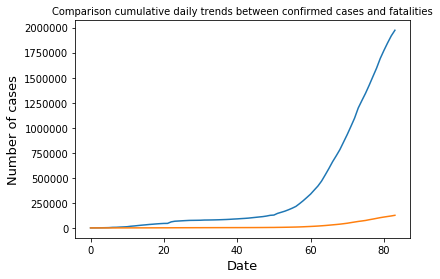

In [4]:
# train['DailyConfirmedCases'] = (train['ConfirmedCases'] - train['ConfirmedCases'].shift(1) ).fillna(0)
# train['DailyFatalities'] = (train['Fatalities'] - train['Fatalities'].shift(1)).fillna(0)

display(train[train['Country_Region'] =='Afghanistan'])

train_trends = train.groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
# display(train_trends)

fig, (ax1) = plt.subplots(1, 1)
ax1.plot(train_trends['Day_num'], train_trends['ConfirmedCases'])
ax1.plot(train_trends['Day_num'], train_trends['Fatalities'])
ax1.set_title("Comparison cumulative daily trends between confirmed cases and fatalities", size=10)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)

# Daily data trend without china


/home/bjit/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

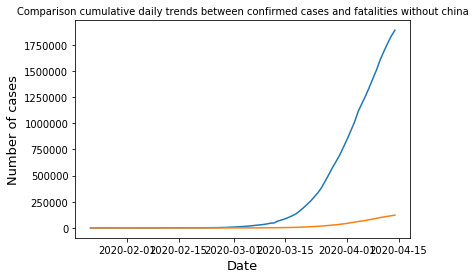

In [5]:
train_with_china = train[train['Country_Region']!='China'].groupby('Date')[['ConfirmedCases', 'Fatalities']].sum().reset_index()

train_trends = train_with_china.groupby('Date')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
# display(train_trends)

fig, (ax1) = plt.subplots(1, 1)
ax1.plot(train_trends['Date'], train_trends['ConfirmedCases'])
ax1.plot(train_trends['Date'], train_trends['Fatalities'])
ax1.set_title("Comparison cumulative daily trends between confirmed cases and fatalities without china", size=10)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)

# Country China, Spain, France, UK, USA wise  daily data trends

Text(0.5, 0, 'Day number')

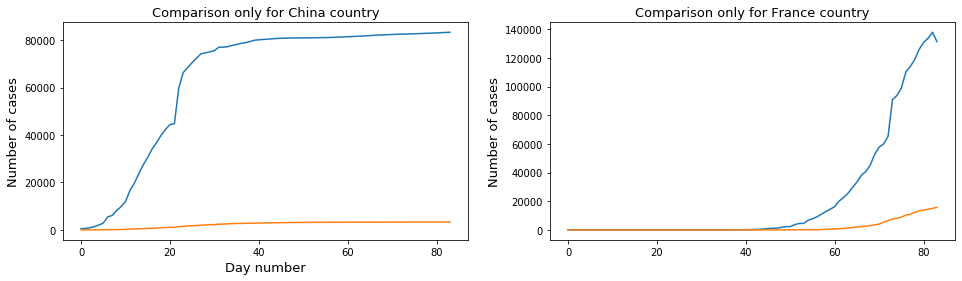

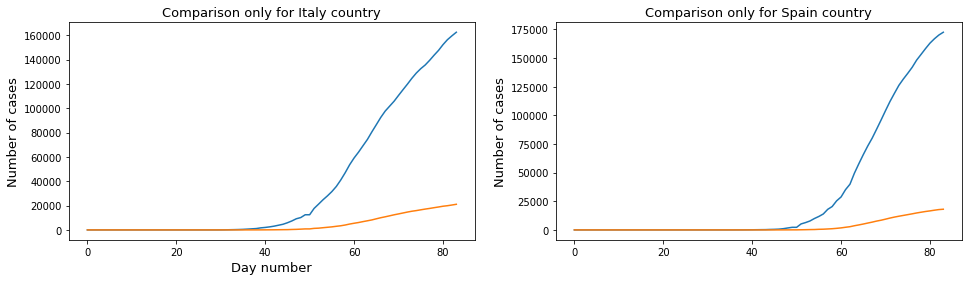

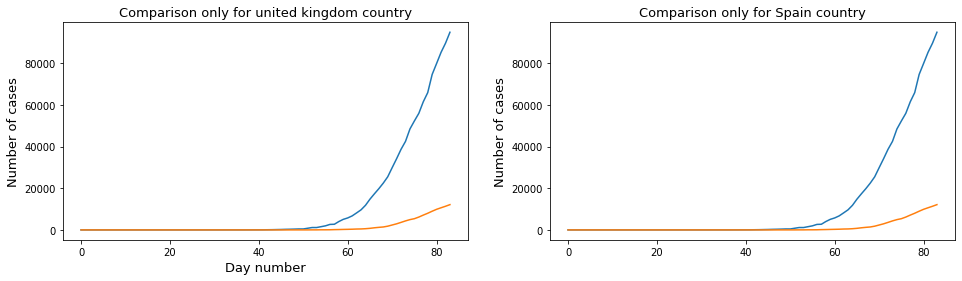

In [6]:


train_china = train[train['Country_Region']=='China'].groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
train_china_trends = train_china.groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()

train_france = train[train['Country_Region']=='France'].groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
train_france_trends = train_france.groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()

train_italy = train[train['Country_Region']=='Italy'].groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
train_italy_trends = train_italy.groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()

train_spain = train[train['Country_Region']=='Spain'].groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
train_spain_trends = train_spain.groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()

train_united_kingdom = train[train['Country_Region']=='United Kingdom'].groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
train_united_kingdom_trends = train_united_kingdom.groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()

train_us = train[train['Country_Region']=='US'].groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
train_us_trends = train_united_kingdom.groupby('Day_num')[['ConfirmedCases', 'Fatalities']].sum().reset_index()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(train_china_trends['Day_num'], train_china_trends['ConfirmedCases'])
ax1.plot(train_china_trends['Day_num'], train_china_trends['Fatalities'])
ax1.set_title("Comparison only for China country", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Day number", size=13)

ax2.plot(train_france_trends['Day_num'], train_france_trends['ConfirmedCases'])
ax2.plot(train_france_trends['Day_num'], train_france_trends['Fatalities'])
ax2.set_title("Comparison only for France country", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Day number", size=13)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(train_italy_trends['Day_num'], train_italy_trends['ConfirmedCases'])
ax1.plot(train_italy_trends['Day_num'], train_italy_trends['Fatalities'])
ax1.set_title("Comparison only for Italy country", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Day number", size=13)

ax2.plot(train_spain_trends['Day_num'], train_spain_trends['ConfirmedCases'])
ax2.plot(train_spain_trends['Day_num'], train_spain_trends['Fatalities'])
ax2.set_title("Comparison only for Spain country", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Day number", size=13)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(train_united_kingdom_trends['Day_num'], train_united_kingdom_trends['ConfirmedCases'])
ax1.plot(train_united_kingdom_trends['Day_num'], train_united_kingdom_trends['Fatalities'])
ax1.set_title("Comparison only for united kingdom country", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Day number", size=13)

ax2.plot(train_us_trends['Day_num'], train_us_trends['ConfirmedCases'])
ax2.plot(train_us_trends['Day_num'], train_us_trends['Fatalities'])
ax2.set_title("Comparison only for Spain country", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Day number", size=13)


## With out china, spain, france, UK, USA have same curve
### China was the first affected country of covid-19. Thats why it's curve diffeerent to other

Text(0.5, 0, 'Day number')

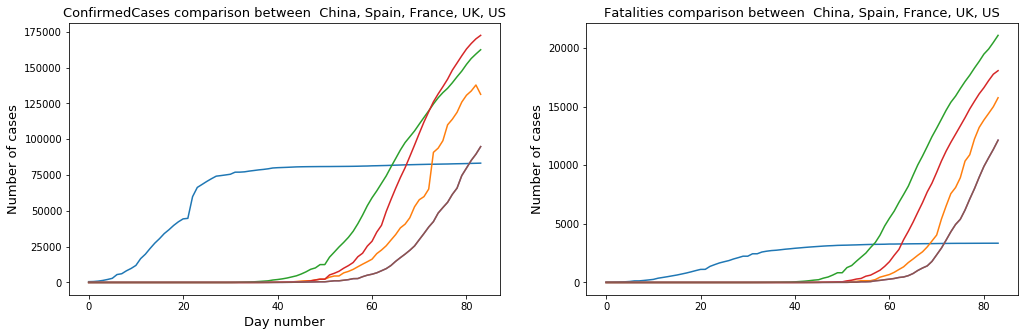

In [7]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,5))
ax1.plot(train_china_trends['Day_num'], train_china_trends['ConfirmedCases'])
ax1.plot(train_france_trends['Day_num'], train_france_trends['ConfirmedCases'])
ax1.plot(train_italy_trends['Day_num'], train_italy_trends['ConfirmedCases'])
ax1.plot(train_spain_trends['Day_num'], train_spain_trends['ConfirmedCases'])
ax1.plot(train_united_kingdom_trends['Day_num'], train_united_kingdom_trends['ConfirmedCases'])
ax1.plot(train_us_trends['Day_num'], train_us_trends['ConfirmedCases'])
ax1.set_title("ConfirmedCases comparison between  China, Spain, France, UK, US", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Day number", size=13)

ax2.plot(train_china_trends['Day_num'], train_china_trends['Fatalities'])
ax2.plot(train_france_trends['Day_num'], train_france_trends['Fatalities'])
ax2.plot(train_italy_trends['Day_num'], train_italy_trends['Fatalities'])
ax2.plot(train_spain_trends['Day_num'], train_spain_trends['Fatalities'])
ax2.plot(train_united_kingdom_trends['Day_num'], train_united_kingdom_trends['Fatalities'])
ax2.plot(train_us_trends['Day_num'], train_us_trends['Fatalities'])
ax2.set_title("Fatalities comparison between  China, Spain, France, UK, US", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Day number", size=13)


* **Italy**. With almost 120.000 confirmed cases, Italy shows one of the most alarming scenarios of COVID-19. The infections curve is very steep, and more than 2% of population has been infected
* **Spain**. Spain has the same number of cumulative infected cases than Italy, near 120.000. However, Spains total population is lower (around 42 millions) and hence the percentage of population that has been infected rises up to 3%.
* **United Kingdom**. Despite not being very far from them, the UK shows less cases. This may be due to the number of tests performed, but its  soon to know for sure. The number of cases is around 40.000, this is, a 0.6 of the total population.

## Add population data with traing data  and remove null

In [8]:
population.loc[ population['Country (or dependency)']== 'United States', 'Country (or dependency)'] = 'US'
train = train.merge(population, left_on='Country_Region', right_on='Country (or dependency)', how='left').reset_index()

train = train[['Province_State','Country_Region','Date', 'ConfirmedCases', 'Fatalities', 'Day_num', 'Population (2020)', 'Density (P/Km²)', 'Med. Age' ]]
# train = train.reindex(columns=['Province_State','Country_Region','Date', 'ConfirmedCases', 'Fatalities', 'Day_num', 'Population'])


display(train)
train['Province_State'] = train['Province_State'].fillna('None')
train['Population (2020)'] = train['Population (2020)'].fillna(0)

display(train[train['Province_State']=='None'])


# test data merge with population data
test = test.merge(population, left_on='Country_Region', right_on='Country (or dependency)', how='left').reset_index()
test = test[['ForecastId','Province_State','Country_Region','Date',  'Population (2020)', 'Density (P/Km²)', 'Med. Age' ]]
test['Province_State'] = test['Province_State'].fillna('None')
test['Population (2020)'] = test['Population (2020)'].fillna(0)

display(test[test['Province_State']=='None'])


,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Day_num,Population (2020),Density (P/Km²),Med. Age
0,NaN,Afghanistan,2020-01-22,0.0,0.0,0,38728504.0,60.0,18
1,NaN,Afghanistan,2020-01-23,0.0,0.0,1,38728504.0,60.0,18
2,NaN,Afghanistan,2020-01-24,0.0,0.0,2,38728504.0,60.0,18
3,NaN,Afghanistan,2020-01-25,0.0,0.0,3,38728504.0,60.0,18
4,NaN,Afghanistan,2020-01-26,0.0,0.0,4,38728504.0,60.0,18
...,...,...,...,...,...,...,...,...,...
26287,NaN,Zimbabwe,2020-04-10,13.0,3.0,79,14814609.0,38.0,19
26288,NaN,Zimbabwe,2020-04-11,14.0,3.0,80,14814609.0,38.0,19
26289,NaN,Zimbabwe,2020-04-12,14.0,3.0,81,14814609.0,38.0,19
26290,NaN,Zimbabwe,2020-04-13,17.0,3.0,82,14814609.0,38.0,19


,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Day_num,Population (2020),Density (P/Km²),Med. Age
0,None,Afghanistan,2020-01-22,0.0,0.0,0,38728504.0,60.0,18
1,None,Afghanistan,2020-01-23,0.0,0.0,1,38728504.0,60.0,18
2,None,Afghanistan,2020-01-24,0.0,0.0,2,38728504.0,60.0,18
3,None,Afghanistan,2020-01-25,0.0,0.0,3,38728504.0,60.0,18
4,None,Afghanistan,2020-01-26,0.0,0.0,4,38728504.0,60.0,18
...,...,...,...,...,...,...,...,...,...
26287,None,Zimbabwe,2020-04-10,13.0,3.0,79,14814609.0,38.0,19
26288,None,Zimbabwe,2020-04-11,14.0,3.0,80,14814609.0,38.0,19
26289,None,Zimbabwe,2020-04-12,14.0,3.0,81,14814609.0,38.0,19
26290,None,Zimbabwe,2020-04-13,17.0,3.0,82,14814609.0,38.0,19


,ForecastId,Province_State,Country_Region,Date,Population (2020),Density (P/Km²),Med. Age
0,1,None,Afghanistan,2020-04-02,38728504.0,60.0,18
1,2,None,Afghanistan,2020-04-03,38728504.0,60.0,18
2,3,None,Afghanistan,2020-04-04,38728504.0,60.0,18
3,4,None,Afghanistan,2020-04-05,38728504.0,60.0,18
4,5,None,Afghanistan,2020-04-06,38728504.0,60.0,18
...,...,...,...,...,...,...,...
13454,13455,None,Zimbabwe,2020-05-10,14814609.0,38.0,19
13455,13456,None,Zimbabwe,2020-05-11,14814609.0,38.0,19
13456,13457,None,Zimbabwe,2020-05-12,14814609.0,38.0,19
13457,13458,None,Zimbabwe,2020-05-13,14814609.0,38.0,19


## Counting the null vlaue

In [9]:
null_count = {col:train[col].isnull().sum() for col in train.columns}
display(null_count)
# missings = pd.DataFrame.from_dict(null_count, orient='index')
# print(missings.nlargest(30, 0))

# test data NAN chaek
null_count = {col:test[col].isnull().sum() for col in test.columns}
display(null_count)

{'Province_State': 0,
 'Country_Region': 0,
 'Date': 0,
 'ConfirmedCases': 0,
 'Fatalities': 0,
 'Day_num': 0,
 'Population (2020)': 0,
 'Density (P/Km²)': 1176,
 'Med. Age': 1176}

{'ForecastId': 0,
 'Province_State': 0,
 'Country_Region': 0,
 'Date': 0,
 'Population (2020)': 0,
 'Density (P/Km²)': 602,
 'Med. Age': 602}

## Country wise confirmcase and Fatalities Parcentage

,index,Country_Region,ConfirmedCases,Fatalities
0,36,China,0.003717,0.000134
1,61,France,0.001307,0.000117
2,84,Italy,0.002183,0.000250
3,156,Spain,0.001910,0.000176
4,171,US,0.004781,0.000152
5,175,United Kingdom,0.000709,0.000074


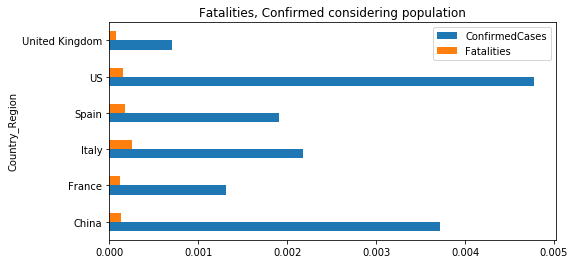

In [10]:


train_country_total = train.groupby('Country_Region')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
# or (train_country_total['Country_Region']== 'Spain') or (train_country_total['Country_Region']== 'Italy') or (train_country_total['Country_Region']== 'US') or (train_country_total['Country_Region']== 'United Kingdom')
train_country_total = train_country_total[ (train_country_total['Country_Region']== 'China') | (train_country_total['Country_Region']== 'France')  | (train_country_total['Country_Region']== 'Spain') | (train_country_total['Country_Region']== 'Italy') | (train_country_total['Country_Region']== 'US') | (train_country_total['Country_Region']== 'United Kingdom') ].reset_index()

train_country_total[['ConfirmedCases', 'Fatalities']] = train_country_total[['ConfirmedCases', 'Fatalities']]/population[population['Country (or dependency)']=='China'].loc[0,'Population (2020)']
display(train_country_total)

train_country_total.plot(x = 'Country_Region', y = ["ConfirmedCases","Fatalities"],kind='barh', title = 'Fatalities, Confirmed considering population',figsize = (8,4))


# split the traing data



In [11]:

# train_split = train.loc[ ( train['Day_num']>40) & (train['Day_num']<=65 ), ['Day_num','Province_State', 'Country_Region', 'Date', 'ConfirmedCases', 'Fatalities','Population (2020)', 'Density (P/Km²)', 'Med. Age' ]] 

# test_split = train.loc[train['Day_num']>65, ['Day_num','Province_State', 'Country_Region', 'Date', 'ConfirmedCases', 'Fatalities','Population (2020)', 'Density (P/Km²)', 'Med. Age' ]]

# test_split['ForecastId'] = test_split.loc[:,'Day_num']
# display(test_split[test_split['Country_Region']=='Afghanistan'])

# train = train_split.reset_index() 
# test = test_split.reset_index() 


# train = train.loc[ ( train['Day_num']>40) & (train['Day_num']<=65 ), ['Day_num','Province_State', 'Country_Region', 'Date', 'ConfirmedCases', 'Fatalities','Population (2020)', 'Density (P/Km²)', 'Med. Age' ]]

def data_split(data, train_sd, train_ed, test_sd, test_ed):
    _train = data.loc[ ( data['Day_num']>=train_sd) & (train['Day_num']<=train_ed ), ['Day_num','Province_State', 'Country_Region', 'Date', 'ConfirmedCases', 'Fatalities','Population (2020)', 'Density (P/Km²)', 'Med. Age' ]]
    _test = data.loc[ ( data['Day_num']>=test_sd) & (train['Day_num']<=test_ed ), ['Day_num','Province_State', 'Country_Region', 'Date', 'ConfirmedCases', 'Fatalities','Population (2020)', 'Density (P/Km²)', 'Med. Age' ]]
    
    return _train, _test



# Implemented the XGBoost algorithm


In [12]:
# countries = train.Country_Region.unique()
# test['Province_State'] = test['Province_State'].fillna('None')
# display(train.head())

# xout = pd.DataFrame({'ForecastId': [],  'ConfirmedCases': [], 'Fatalities': []})

# for country in countries:
#     states = train.loc[train.Country_Region == country, :].Province_State.unique()
# #     display(states)
#     for state in states:
#         #trian
#         x_train_CS = train.loc[(train.Country_Region == country) & (train.Province_State == state), ['Province_State', 'Country_Region', 'Date', 'ConfirmedCases', 'Fatalities','Population (2020)', 'Density (P/Km²)', 'Med. Age' ]]
        
#         y1_train_CS = x_train_CS.loc[:, 'ConfirmedCases']
#         y2_train_CS = x_train_CS.loc[:, 'Fatalities']
#         x_train_CS = x_train_CS.loc[:, ['Province_State', 'Country_Region', 'Date','Population (2020)',"Density (P/Km²)","Med. Age"]]
#         x_train_CS.Country_Region = preprocessing.LabelEncoder().fit_transform(x_train_CS.Country_Region)
#         x_train_CS['Province_State'] = preprocessing.LabelEncoder().fit_transform(x_train_CS['Province_State'])
#         x_train_CS['Date'] = x_train_CS.Date.dt.strftime("%Y%m%d")
#         x_train_CS["Date"]  = x_train_CS["Date"].astype(int)
#         x_train_CS["Density (P/Km²)"]  = x_train_CS["Density (P/Km²)"].astype(np.float32)
#         x_train_CS["Med. Age"]  = x_train_CS["Med. Age"].astype(np.float32)
        

#         x_test_CS = test.loc[(test.Country_Region == country) & (test.Province_State == state), ['Province_State', 'Country_Region', 'Date', 'ForecastId','Population (2020)', 'Density (P/Km²)', 'Med. Age']]

# #         display(x_test_CS)
#         x_test_CS_Id = x_test_CS.loc[:, 'ForecastId']
# #         x_test_CS_Date = x_test_CS.loc[:, 'Date']
#         x_test_CS = x_test_CS.loc[:, ['Province_State', 'Country_Region', 'Date' ,'Population (2020)', 'Density (P/Km²)', 'Med. Age']]
#         x_test_CS.Country_Region = preprocessing.LabelEncoder().fit_transform(x_test_CS.Country_Region)
#         x_test_CS['Province_State'] = preprocessing.LabelEncoder().fit_transform(x_test_CS['Province_State'])
#         x_test_CS['Date'] = x_test_CS.Date.dt.strftime("%Y%m%d")
#         x_test_CS["Date"]  = x_test_CS["Date"].astype(int)
#         x_test_CS["Density (P/Km²)"]  = x_test_CS["Density (P/Km²)"].astype(np.float32)
#         x_test_CS["Med. Age"]  = x_test_CS["Med. Age"].astype(np.float32)
    
# #         x_train_CS = x_train_CS.values
# #         x_test_CS = x_test_CS.values

# #         x_test_CS = x_train_CS[x_train_CS.columns]

# #         x_test_CS = x_train_CS[x_train_CS.columns]
# #         x_train_CS = np.array(x_train_CS)
# #         x_test_CS = np.array(x_test_CS)
        
    
#         xmodel1 = XGBRegressor(n_estimators=1000)
#         xmodel1.fit(x_train_CS, y1_train_CS)
#         y1_xpred = xmodel1.predict(x_test_CS)
        
#         xmodel2 = XGBRegressor(n_estimators=1000)
#         xmodel2.fit(x_train_CS, y2_train_CS)
#         y2_xpred = xmodel2.predict(x_test_CS)
        
#         xdata = pd.DataFrame({'ForecastId': x_test_CS_Id, 'ConfirmedCases': y1_xpred, 'Fatalities': y2_xpred})
#         xout = pd.concat([xout, xdata], axis=0)

        
# xout.ForecastId = xout.ForecastId.astype('int')
# xout['ConfirmedCases'] = round(xout['ConfirmedCases'],1)
# xout['Fatalities'] = round(xout['Fatalities'],1)     
# xout['ConfirmedCases'] = xout['ConfirmedCases'].apply(int)
# xout['Fatalities'] = xout['Fatalities'].apply(int)


# display(xout.iloc[173:180,:])

# xout.to_csv('submission.csv', index=False)

# Accuracy calculation

In [13]:
# ConfirmedCases_accuracy = accuracy_score(test['ConfirmedCases'], xout['ConfirmedCases'])
# print("ConfirmedCases accuracy : %.2f%%" % (ConfirmedCases_accuracy * 100.0))
# Fatalities_accuracy = accuracy_score(test['Fatalities'], xout['Fatalities'])
# print("Fatalities accuracy: %.2f%%" % (Fatalities_accuracy * 100.0))



# Implemented the logistic funtion

In [14]:
def logistic_function(x, w, b,a,c):
    return a / (c + np.exp(-( b + x * w ) ))


def fit_logistic(all_data, country_name, province_name, target):
    data_cp = all_data.loc[(all_data['Country_Region']==country_name) & (all_data['Province_State']==province_name), ['Day_num', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases', 'Fatalities','Population (2020)'] ]
   
    y = data_cp[target].astype(np.int32)
#     display(y)
    x = data_cp.drop(['ConfirmedCases', 'Fatalities', 'Date'], axis=1)   # list(range(0, len(y)))
    x.Country_Region = preprocessing.LabelEncoder().fit_transform(x.Country_Region)
    x['Province_State'] = preprocessing.LabelEncoder().fit_transform(x['Province_State'])
    x = x['Day_num']

    (w_, b_,a_,c_), cov = optimize.curve_fit(logistic_function, x, y)

    y_fit = logistic_function(x, w_, b_,a_,c_)
#     display(w_, b_,a_,c_)
    return x, y, y_fit, (w_, b_,a_,c_), cov



def plot_logistic(x, y, y_fit, country_name, province_name, target):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(x, y, 'o')
    ax.plot(x, y_fit, '-')
    ax.set_xlabel("Day count (starting on January 22nd)")
    ax.set_ylabel(target)
    ax.set_title("Fit to logistic regression for "+ country_name+"/"+province_name)
    
    
    
def predic_by_logistic_function(test, country_name, province_name, target, w_, b_, a_, c_):
    df_test = test.loc[(train['Country_Region']==country_name) & (test['Province_State']==province_name), ['Day_num', 'Province_State', 'Country_Region', 'Date', 'ConfirmedCases', 'Fatalities','Population (2020)']]
    
    forecast = logistic_function(df_test['Day_num'],  w_, b_, a_, c_)
#     //dates = list(range(0,len(df_train)))
    
    # Plot results
    fig, (ax1) = plt.subplots(1, 1, figsize=(6,4))
    ax1.plot(df_test['Day_num'], df_test[target])
    ax1.plot(df_test['Day_num'], forecast)
    ax1.axvline(75, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.set_title("Actual ConfirmedCases vs predictions based on Logistic curve for "+country_name + "/"+province_name)
    ax1.legend([ 'Actual cases','Predicted cases'], loc='upper left')
    ax1.set_xlabel("Day count starting on January 22nd")
    ax1.set_ylabel("ConfirmedCases")
    predicData = pd.DataFrame({'ForecastId': df_test['Day_num'], 'forecast': forecast, 'actual': df_test[target]})
    
    return predicData
    
    

    


# Logistics funtion testing for different country

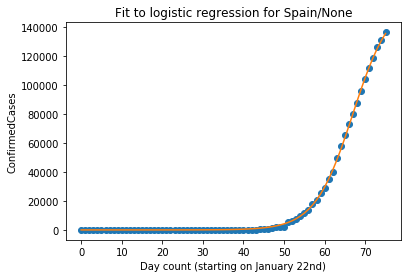

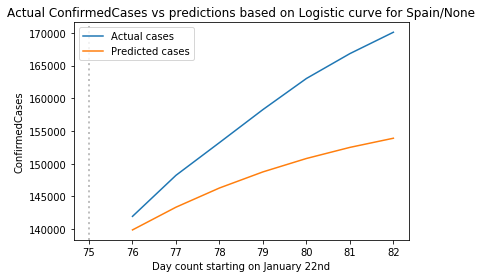

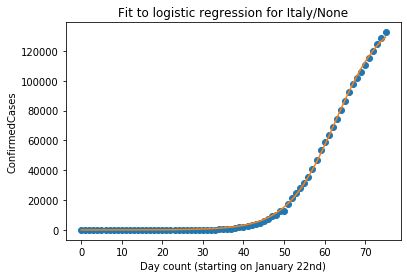

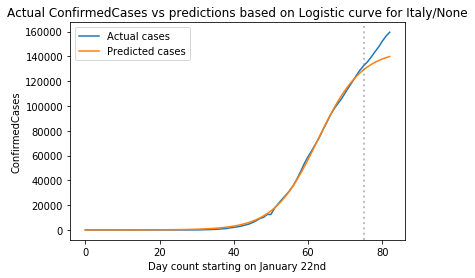

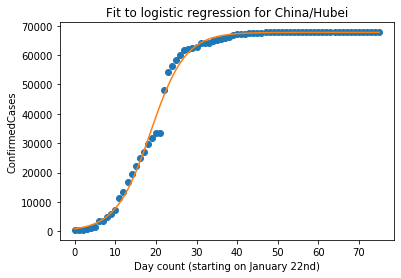

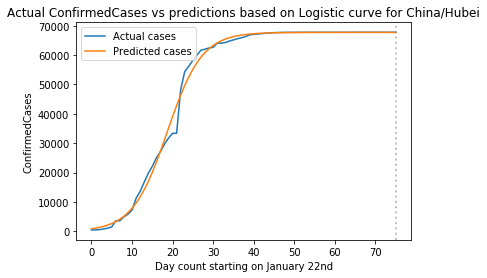

In [16]:
   
country_name = 'Spain'
province_name = 'None'
train_, test_ = data_split(train, 0, 75, 76,82)

x, y, y_fit, (w_, b_,a_,c_), cov  =fit_logistic(train_, country_name, province_name, 'ConfirmedCases')
plot_logistic(x, y, y_fit, country_name, province_name, 'ConfirmedCases')
predic_by_logistic_function(test_, country_name, province_name, 'ConfirmedCases', w_, b_,a_,c_)
    


    
country_name = 'Italy'
province_name = 'None'
train_, test_ = data_split(train, 0, 75, 0,82)

x, y, y_fit, (w_, b_,a_,c_), cov  =fit_logistic(train_, country_name, province_name, 'ConfirmedCases')
plot_logistic(x, y, y_fit, country_name, province_name, 'ConfirmedCases')
predic_by_logistic_function(test_, country_name, province_name, 'ConfirmedCases', w_, b_,a_,c_)



# China Hubei

country_name = 'China'
province_name = 'Hubei'
train_, test_ = data_split(train, 0, 75, 0,75)

x, y, y_fit, (w_, b_,a_,c_), cov  =fit_logistic(train_, country_name, province_name, 'ConfirmedCases')
plot_logistic(x, y, y_fit, country_name, province_name, 'ConfirmedCases')
predic_by_logistic_function(test_, country_name, province_name, 'ConfirmedCases', w_, b_,a_,c_)


# Logistics function for all countries

In [ ]:
countries = train.Country_Region.unique()
test['Province_State'] = test['Province_State'].fillna('None')
display(train.head())

xout = pd.DataFrame({'ForecastId': [],  'ConfirmedCases': [], 'Fatalities': []})

for country in countries:
    states = train.loc[train.Country_Region == country, :].Province_State.unique()
#     display(states)
    for state in states:
        #trian
        x_train_CS = train.loc[(train.Country_Region == country) & (train.Province_State == state), ['Day_num','Province_State', 'Country_Region', 'Date', 'ConfirmedCases', 'Fatalities','Population (2020)', 'Density (P/Km²)', 'Med. Age' ]]
        
        x_test_CS = test.loc[(test.Country_Region == country) & (test.Province_State == state), ['Day_num', 'Province_State', 'Country_Region', 'Date', 'ForecastId','Population (2020)', 'Density (P/Km²)', 'Med. Age']]
        x_test_CS_Id = x_test_CS.loc[:, 'ForecastId']
        
        
        y1_train_CS = x_train_CS.loc[:, 'ConfirmedCases']
        y2_train_CS = x_train_CS.loc[:, 'Fatalities']
        
        
        country_name = country
        province_name = state
        x, y, y_fit, (w_, b_,a_,c_), cov  = fit_logistic(train_, country_name, province_name, 'ConfirmedCases')
        
        forecast = logistic_function(x_test_CS['Day_num'],  w_, b_, a_, c_)
        
        predic_by_logistic_function(test_, country_name, province_name, 'ConfirmedCases', w_, b_,a_,c_)
        
#         plot_logistic(x, y, y_fit, country_name, province_name, 'ConfirmedCases')
        
    
    
        xdata = pd.DataFrame({'ForecastId': x_test_CS_Id, 'ConfirmedCases': y1_xpred, 'Fatalities': y2_xpred})
        xout = pd.concat([xout, xdata], axis=0)
        
        x_train_CS = x_train_CS.loc[:, ['Province_State', 'Country_Region', 'Date','Population (2020)',"Density (P/Km²)","Med. Age"]]
        x_train_CS.Country_Region = preprocessing.LabelEncoder().fit_transform(x_train_CS.Country_Region)
        x_train_CS['Province_State'] = preprocessing.LabelEncoder().fit_transform(x_train_CS['Province_State'])
        x_train_CS['Date'] = x_train_CS.Date.dt.strftime("%Y%m%d")
        x_train_CS["Date"]  = x_train_CS["Date"].astype(int)
        x_train_CS["Density (P/Km²)"]  = x_train_CS["Density (P/Km²)"].astype(np.float32)
        x_train_CS["Med. Age"]  = x_train_CS["Med. Age"].astype(np.float32)
        

        

#         display(x_test_CS)
        x_test_CS_Id = x_test_CS.loc[:, 'ForecastId']
#         x_test_CS_Date = x_test_CS.loc[:, 'Date']
        x_test_CS = x_test_CS.loc[:, ['Province_State', 'Country_Region', 'Date' ,'Population (2020)', 'Density (P/Km²)', 'Med. Age']]
        x_test_CS.Country_Region = preprocessing.LabelEncoder().fit_transform(x_test_CS.Country_Region)
        x_test_CS['Province_State'] = preprocessing.LabelEncoder().fit_transform(x_test_CS['Province_State'])
        x_test_CS['Date'] = x_test_CS.Date.dt.strftime("%Y%m%d")
        x_test_CS["Date"]  = x_test_CS["Date"].astype(int)
        x_test_CS["Density (P/Km²)"]  = x_test_CS["Density (P/Km²)"].astype(np.float32)
        x_test_CS["Med. Age"]  = x_test_CS["Med. Age"].astype(np.float32)
    
#         x_train_CS = x_train_CS.values
#         x_test_CS = x_test_CS.values

#         x_test_CS = x_train_CS[x_train_CS.columns]

#         x_test_CS = x_train_CS[x_train_CS.columns]
#         x_train_CS = np.array(x_train_CS)
#         x_test_CS = np.array(x_test_CS)
        
    
        xmodel1 = XGBRegressor(n_estimators=1000)
        xmodel1.fit(x_train_CS, y1_train_CS)
        y1_xpred = xmodel1.predict(x_test_CS)
        
        xmodel2 = XGBRegressor(n_estimators=1000)
        xmodel2.fit(x_train_CS, y2_train_CS)
        y2_xpred = xmodel2.predict(x_test_CS)
        
        xdata = pd.DataFrame({'ForecastId': x_test_CS_Id, 'ConfirmedCases': y1_xpred, 'Fatalities': y2_xpred})
        xout = pd.concat([xout, xdata], axis=0)

        
xout.ForecastId = xout.ForecastId.astype('int')
xout['ConfirmedCases'] = round(xout['ConfirmedCases'],1)
xout['Fatalities'] = round(xout['Fatalities'],1)     
xout['ConfirmedCases'] = xout['ConfirmedCases'].apply(int)
xout['Fatalities'] = xout['Fatalities'].apply(int)


display(xout.iloc[173:180,:])

# xout.to_csv('submission.csv', index=False)